# A framework for machine learning projects

In general, supervised machine learning projects follow a certain flow. While the particulars of what happens in each step are different and may be more involved than others, usually you have the following steps. Steps 7 and 8 are kinda optional, but I would imagine tend to occur more often than not.

## 1) Import libraries, set random seed


In [1]:
# imports
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import seaborn as sns
%matplotlib inline

np.random.seed(10) # any number is fine, pick your favorite
# any others you might need...

## 2) Get your data and load it into your environment

This can take a lot of forms depending on what kind of data you're working with. Common functions:

In [2]:
# pd.read_csv()
# using urllib.request() to call an API
# json.dumps()
# many others...
iris = load_iris()


In [3]:
print(iris.keys())

for key in iris.keys():
    print(f'{key}: \n')
    if key != 'data':
        print(iris[key])
    print()


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
data: 


target: 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

target_names: 

['setosa' 'versicolor' 'virginica']

DESCR: 

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================

In [4]:
test = pd.DataFrame(iris['target'], columns=['target'])
test2 = pd.DataFrame(iris['target_names'], columns=['target_names'])

In [5]:
test.merge(test2, left_on='target', right_index=True)

,target,target_names
0,0,setosa
1,0,setosa
2,0,setosa
3,0,setosa
4,0,setosa
5,0,setosa
6,0,setosa
7,0,setosa
8,0,setosa
9,0,setosa


In [6]:
pd.DataFrame(iris['target_names'], columns=['target_names'])

,target_names
0,setosa
1,versicolor
2,virginica


In [7]:
iris_df = pd.concat((pd.DataFrame(iris['data'], columns=iris['feature_names']), 
           pd.DataFrame(iris['target'], columns=['target'])), 
          axis=1)\
          .merge(test2, left_on='target', right_index=True)

In [8]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [9]:
iris_df.shape

(150, 6)

## 3) Preprocess your data and do any feature engineering needed

This is the part where you will likely spend most of your time. I always think of this as continuously asking the following questions:

- What is the question I care about asking?
- Does my data have the necessary fields/features in order to answer that question?
- What transformations do I need to do to get the necessary fields?
- Do I have any relevant time elements? How am I accounting for those from a feature perspective?
- Are there features in my data that I can reasonably ignore/exclude from further analysis?

This is the part where you will likely spend most of your time. I always think of this as continuously asking the following questions:

- What is the question I care about asking?
    - Can I predict the target value using KNN and the data provided in the IRIS dataset?
- Does my data have the necessary fields/features in order to answer that question?
    - No idea, but it does have 4 columns of feature data
    - TBD
- What transformations do I need to do to get the necessary fields?
    - TBD
- Do I have any relevant time elements? How am I accounting for those from a feature perspective?
    - No.
- Are there features in my data that I can reasonably ignore/exclude from further analysis?
    - TBD

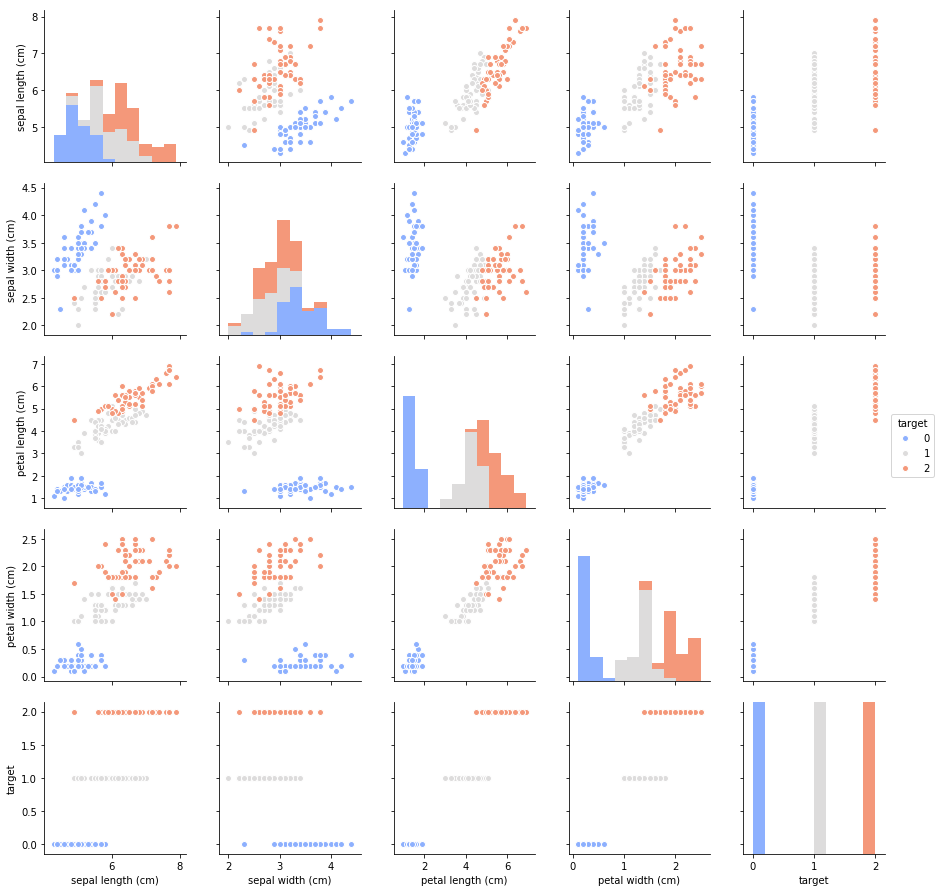

In [10]:
sns.pairplot(iris_df,hue='target',palette='coolwarm')

## 4) Split your data between training, validation, and possibly test sets

For any project, you need both training and validation sets to have functional machine learning models. A test set allows you one extra step of being sure that your model generalizes well.

Questions to ask and answer:

- Do I have enough data that I can just subset it to create this split? Or do I need to get more creative and re-use my training data as validation (i.e., leave-one-out, cross-validation, etc)
- Does my validation/test data reflect the new examples in the wild that this machine learning model would predict moving forward?
- If there is significant class imbalance, do I have enough of each class in my validation set to assess the accuracy of my model on predicting each class?
- If there are time elements, does my validation/test set take care to not "leak" any data about the future into making a prediction?

In general, if you have lots of data, it is best practice to set aside both a validation set and a test set. You can assess model performance on your validation set, and then also look at the performance on the test set. You should expect to see a very strong correlation (coefficient ~1) between validation results and test results. If you choose to do this, DO NOT DIG FOR FURTHER INTERPRETATION IN YOUR TEST SET. It's a subtle thing, but it can be effective.

In [11]:
# common methods
# random sampling
# leave-one-out
# cross-validation
# windows / time slices

from sklearn.model_selection import train_test_split
iris_features_train, iris_features_test, iris_target_train, iris_target_test = train_test_split(iris_df[iris['feature_names']], iris_df['target'], random_state = 0)

In [21]:
(print(f'Shape: {split.shape}') for split in [iris_features_train, iris_features_test, iris_target_train, iris_target_test])

<generator object <genexpr> at 0x1a1d9bde08>


## 5) Perform your machine learning!

Now it's time to actually use that algorithm and get your predictions! This tends to be the following steps:

In [12]:
# common framework
# from sklearn.something import some_algorithm

# if classification problem:
# classifier = imported_classifier
# trained_classifier = classifier.fit(X, y)
# predictions = trained_classifier.predict(validation_set)

# if regression, replace the word 'classifier' with 'regressor'

## 6) Assess model performance and visualize

From here, you want to see how well your model has done in predicting new data in your validation set. You also want to visualize, to see if anything funky is going on.

Common metrics for classification:

- Overall accuracy
- Log loss / cross entropy
- Confusion Matrix

Common metrics for regression:

- R^2
- RMSE (root mean square error)
- MAE (mean absolute error)

It's important to note that you always want to have a baseline of a dumbest-possible model so that you can prove the fancy machine learning that you're doing is better than doing nothing. So for classification, you might think of predicting just one class for everything or rolling an n-sided dice to predict each class. Maybe for regression, you think about what your error would be if you just predicted the mean y value the whole time.

Keep in mind that the sign of a good machine learning model is that it performs well on new data it hasn't seen (AKA generalizes well). So when making a judgement of whether a model is good or not, you really care about the validation metric, not the training metric.

For visualizations, these will really vary on application. With very high dimensional problems, you may be well served showing actuals vs predictions. 

To assess overfitting, evaluate your metric on both your training and validation set. You will expect to see some sort of dropoff in performance in your validation set- however, the magnitude of this is a measure of how much you are overfitting. Again, even though overfitting is a bad thing, keep in mind that the thing we care about the most is performance on new samples, not necessarily the difference between training and validation sets.

In [13]:
# varies

## 7) Repeat steps 3-6 as needed

You may have different assumptions about the data for different machine learning algorithms. Maybe one can take the data raw, the other one needs to have things transformed to normal distributions. Maybe your new algorithm can't take categorical variables, and you have to do some sort of processing here. Maybe you aren't even trying new algorithms, but you had an idea about how to make your existing one better by including more features.

Whatever the case, start back at step 3 and do whatever you need to do in order to create new models and assess their performance relative to your baseline.

In [14]:
# varies... may be a ton of code idk

## 8) Hyperparameter tuning

Most machine learning algorithms have "knobs" that you can turn in order to see if you can get a better model. For example, with k-nearest-neighbors, you can can set K equal to whatever value you like to see if you get a better fit. Other models may have 5 - 20 different things you can manipulate. You should search the hyperparameters to see what gives you the best fit, if you have time. Performing visualizations may also help you understand what's going on.

In [15]:
# varies depending on model used
# typically use grid search or possibly bayesian tuning

## 9) Report your final results!

It's important to make a judgement of which model you find to be the best. This may not always be the best performing one according to your metric, especially if you are worried about being able to interpret your model. If possible, you should try to look at how the model is making its predictions. What variables does it think are the most important?